# Description B-3: Gradient descent (reference)

Suppose we are given a function $f(x, y)$ in two real variables. Assume that this function is convex. A simple example would be the function
$$f (x, y) = x2 + y2$$
which has a unique minimum at $(x, y) = (0, 0)$. Imagine that the function $z = f (x, y)$ describes a landscape (with $x$, $y$ in the plane, and $z$ as the vertical
coordinate). The gradient vector
$$\Delta{f(x, y)} = (fx, fy)$$
describes the direction in which the function $f$ increases the most at the point $(x, y)$, (or the direction of maximum decrease for $−\Delta{f(x, y)}$).

- Consider this fact for the simple function $f(x, y) = x^2 + y^2$. Sketch the *contour lines* $x^2 + y^2 =$ const and verify that the gradient vector $\Delta{f}$ is orthogonal to the contour lines at each point (sketch!). This property forms the basis for the gradient descent method, see also Exercise 4 below.
    
    To find a minimum in general, we proceed iteratively, starting from an initial approximation $(x0, y0)$:
    $$(x_1, y_1) := (x_0, y_0) − \gamma \Delta f(x_0, y_0)$$

    Here, $\gamma > 0$ is a parameter that needs to be chosen appropriately. Choosing $\gamma = 1$ might cause the iteration step to ’overshoot’.
    
    In this case, one might choose $\gamma = 1/2$ and repeat the process, etc.

- Implement and test this strategy for the model problem $f(x, y) = x^2 + y^2$.

----

# Exercise B-5: Generalization of Task 3 for the case $f=f(x,y,z)$

We again choose the simplest example: $f(x, y, z) = x^2 + y^2 + z^2$.

# Solution

1. **Generalization of the Problem**:\
   We started with a function of two variables, $f(x, y) = x^2 + y^2$, which is a simple convex function with a minimum at the origin. The gradient descent method involved taking iterative steps opposite the direction of the gradient to approach the minimum.

   Now, we extend this idea to three variables. Consider the function:
   $f(x, y, z) = x^2 + y^2 + z^2$
   Just like the two-variable case, this function is strictly convex and has a unique global minimum at the point $(0,0,0)$.

2. **Gradient Computation**:\
   The gradient of $f(x,y,z)$ is given by:
   $\nabla f(x, y, z) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right).$
   For our example:
   $\frac{\partial f}{\partial x} = 2x, \quad \frac{\partial f}{\partial y} = 2y, \quad \frac{\partial f}{\partial z} = 2z.$
   Thus:
   $\nabla f(x, y, z) = (2x, 2y, 2z).$

3. **Gradient Descent Update Step**:\
   Given a current approximation $(x\_k, y\_k, z\_k)$ at the $k$-th iteration, the next point is computed as:
   $(x\_{k+1}, y\_{k+1}, z\_{k+1}) := (x\_k, y\_k, z\_k) - \gamma \nabla f(x\_k, y\_k, z\_k)$

   Here, $\gamma > 0$ is the step size or learning rate. The goal is to choose a suitable $\gamma$ that ensures convergence without overshooting.

4. **Stopping Criteria**:\
   As before, we can use a tolerance level to decide when to stop. If the displacement between two consecutive iterations is less than a certain threshold (e.g., `tol = 1e-6`), or if a maximum number of iterations is reached, we terminate the iterative process.

5. **Choice of Initial Point and Learning Rate**:\
   We start at an arbitrary point, for example $(x\_0, y\_0, z\_0) = (1, 1, 1)$. The function $f(x, y, z) = x^2 + y^2 + z^2$ should converge easily for a moderate learning rate (e.g., $\gamma = 0.1$).

6. **Verification**:\
   Since $f(x, y, z)$ is a simple function and its minimum is known, we can verify that our gradient descent procedure converges to $(0,0,0)$.

**Explanation of the Implementation**:

- We extended the original two-variable solution to three variables by adding an additional coordinate `z`.
- The gradient function now returns `(2x, 2y, 2z)` for the given point `(x, y, z)`.
- The update rule is similar, just performed in three dimensions.
- We continue iterating until either the changes are below the tolerance level or we hit the maximum iteration count.
- Since this is a highly convex problem, it should converge quickly to the origin.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gradient_descent_3d(f, grad_f, x0, y0, z0, gamma, tol=1e-6, max_iter=1000):
    """
    Gradient Descent implementation for a three-variable function.
    
    Parameters:
    - f: function to minimize, f(x, y, z)
    - grad_f: function that returns the gradient (fx, fy, fz) at (x, y, z)
    - x0, y0, z0: initial coordinates
    - gamma: learning rate
    - tol: tolerance for stopping criteria
    - max_iter: maximum iterations
    
    Returns:
    - x_hist, y_hist, z_hist: lists of x, y, and z coordinates over iterations
    """
    x, y, z = x0, y0, z0
    x_hist, y_hist, z_hist = [x], [y], [z]
    
    for _ in range(max_iter):
        grad_x, grad_y, grad_z = grad_f(x, y, z)
        
        # Update step
        x_new = x - gamma * grad_x
        y_new = y - gamma * grad_y
        z_new = z - gamma * grad_z
        
        # Stopping criteria
        if np.sqrt((x_new - x)**2 + (y_new - y)**2 + (z_new - z)**2) < tol:
            x, y, z = x_new, y_new, z_new
            x_hist.append(x)
            y_hist.append(y)
            z_hist.append(z)
            break
        
        x, y, z = x_new, y_new, z_new
        x_hist.append(x)
        y_hist.append(y)
        z_hist.append(z)
    
    return x_hist, y_hist, z_hist

In [3]:
# Define the function f(x, y, z) = x^2 + y^2 + z^2
def f_3d(x, y, z):
    return x**2 + y**2 + z**2

def grad_f_3d(x, y, z):
    return 2*x, 2*y, 2*z

In [4]:
# Initial point and parameters
x0, y0, z0 = 1.0, 1.0, 1.0  # Start from (1,1,1)
gamma = 0.1                 # Learning rate

In [5]:
# Perform gradient descent
x_hist_3d, y_hist_3d, z_hist_3d = gradient_descent_3d(f_3d, grad_f_3d, x0, y0, z0, gamma)

In [6]:
print("Converged to minimum at:")
print(f"x = {x_hist_3d[-1]:.6f}, y = {y_hist_3d[-1]:.6f}, z = {z_hist_3d[-1]:.6f}")

Converged to minimum at:
x = 0.000002, y = 0.000002, z = 0.000002


In [7]:
# Verify that f at this point is indeed minimal
final_value = f_3d(x_hist_3d[-1], y_hist_3d[-1], z_hist_3d[-1])
print(f"f(x, y, z) at this point: {final_value:.6e}")

f(x, y, z) at this point: 1.100879e-11


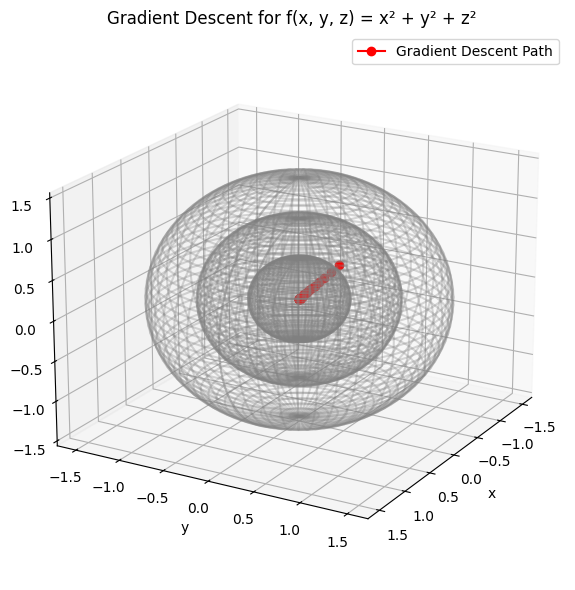

In [8]:
# Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot a few spherical level sets (like contours)
radii = [0.5, 1.0, 1.5]  # radii for spheres
u = np.linspace(0, 2*np.pi, 50)
v = np.linspace(0, np.pi, 50)

for r in radii:
    x_sphere = r * np.outer(np.cos(u), np.sin(v))
    y_sphere = r * np.outer(np.sin(u), np.sin(v))
    z_sphere = r * np.outer(np.ones_like(u), np.cos(v))
    # Plot the wireframe for the sphere contour
    ax.plot_wireframe(x_sphere, y_sphere, z_sphere, color='gray', alpha=0.3)

# Plot the gradient descent path
ax.plot(x_hist_3d, y_hist_3d, z_hist_3d, 'ro-', label="Gradient Descent Path")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Gradient Descent for f(x, y, z) = x² + y² + z²")

# Adjust the viewing angle for better visualization
ax.view_init(elev=20, azim=30)
ax.legend()
plt.tight_layout()
plt.show()